2025-05-03 13:00:56.714605: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-03 13:00:56.730656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746302456.750814 1065614 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746302456.757041 1065614 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746302456.772447 1065614 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

31812


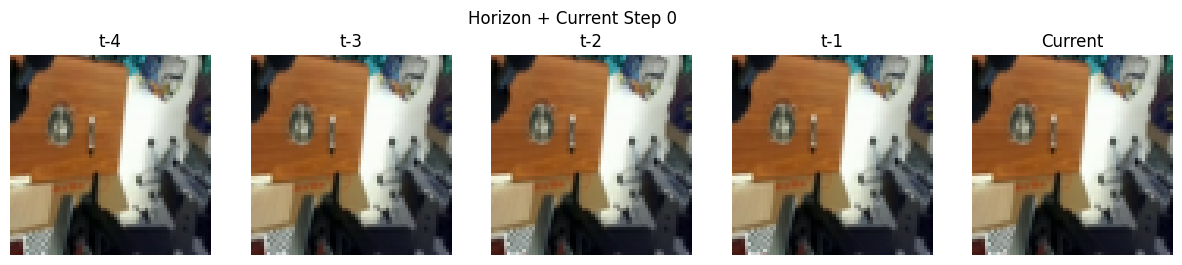

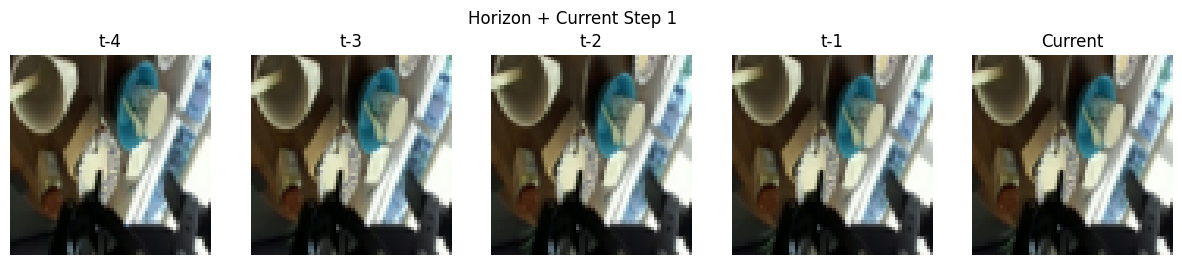

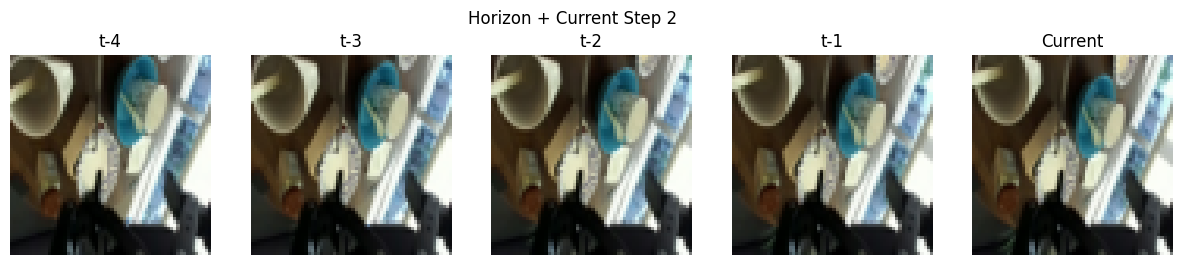

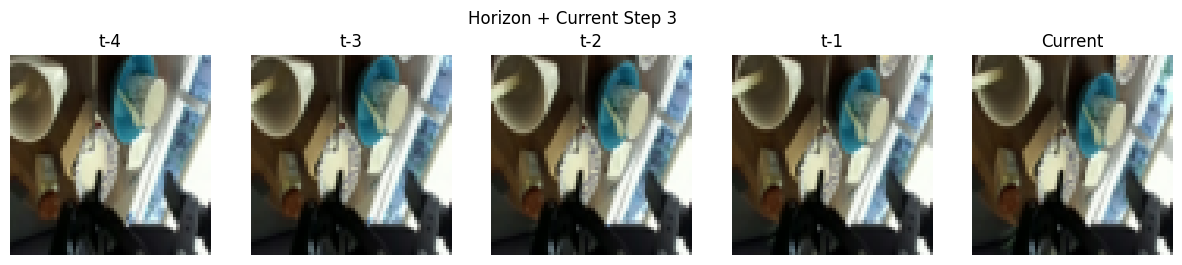

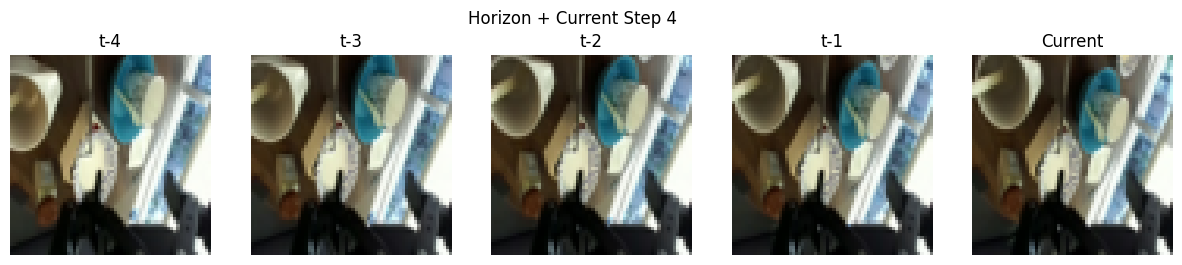

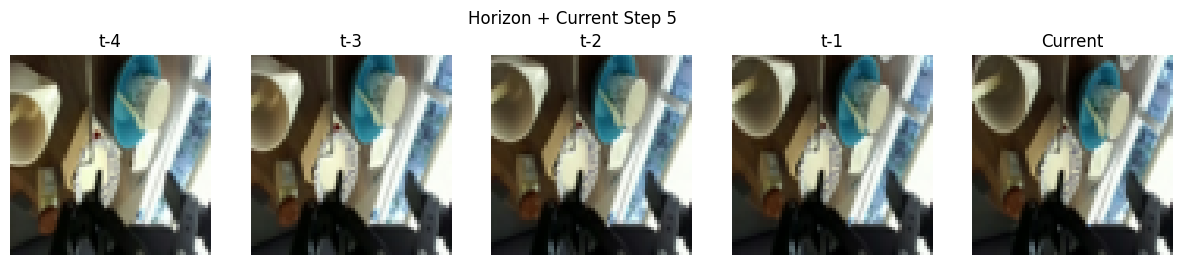

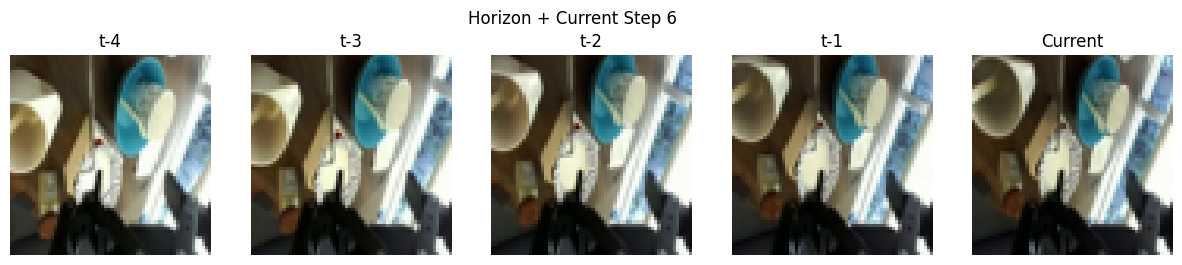

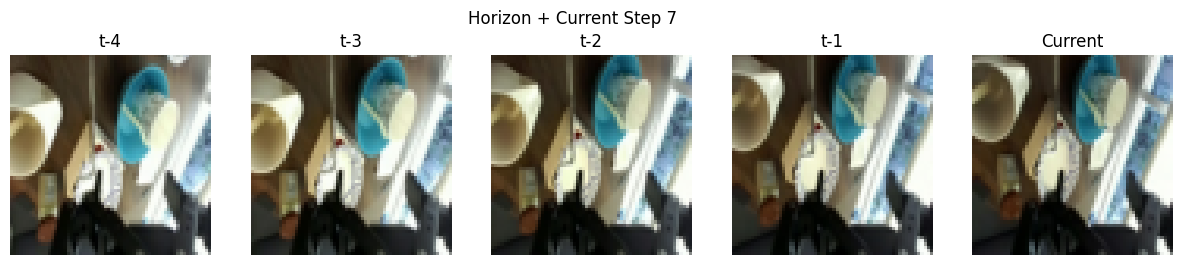

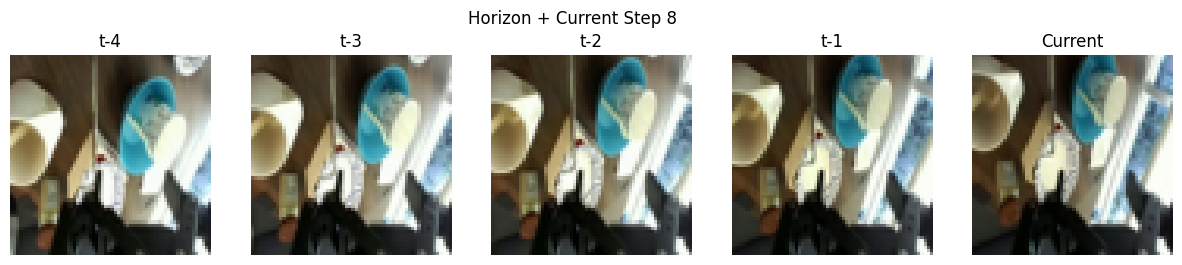

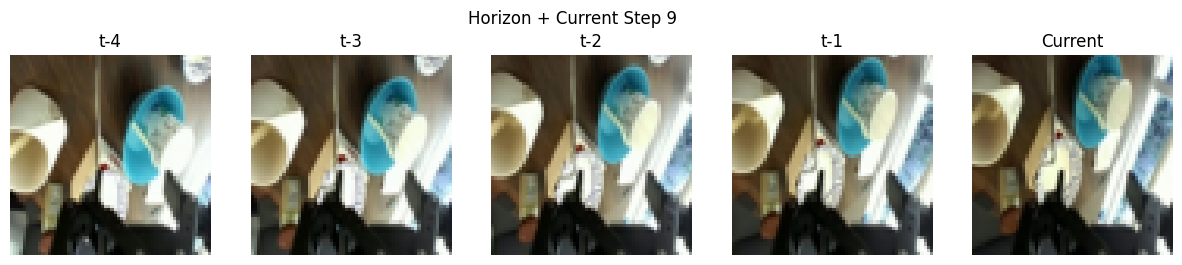

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

from configs.config import Config
from src.datasets.droid_dataset import DroidDatasetIndexed as DroidDataset

cfg = Config()
ds = DroidDataset(
    data_path=cfg.data.data_dir,
    dataset_name=cfg.data.dataset_name,
    horizon=cfg.data.horizon,
    img_size=cfg.data.img_size,
)
print(len(ds))

for i in range(10):
    sample = ds[-i]

    context_obs = sample["context_obs"]
    act_obs = sample["context_acts"]
    obs = sample["obs"]

    obs_imgs = [TF.to_pil_image((img + 1) / 2.0) for img in context_obs]

    obs_imgs.append(TF.to_pil_image((obs + 1) / 2.0))

    # Plot
    fig, axs = plt.subplots(1, len(obs_imgs), figsize=(3 * len(obs_imgs), 3))
    if len(obs_imgs) == 1:
        axs = [axs]
    for j, (ax, img) in enumerate(zip(axs, obs_imgs)):
        ax.imshow(img)
        ax.axis("off")
        if j == len(obs_imgs) - 1:
            ax.set_title("Current")
        else:
            ax.set_title(f"t-{len(obs_imgs) - j - 1}")
    plt.suptitle(f"Horizon + Current Step {i}")
    plt.show()